In [1]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys 
import matplotlib 

%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas version 1.1.4
Matplotlib version 3.2.2


In [4]:
names = ['Bob','Jessica','Mary','John','Mel']

In [7]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [9]:
births = [random.randint(low=0,high=1000) for i in range(1000)] 
births[:10]

[905, 52, 796, 217, 874, 161, 605, 230, 593, 464]

In [10]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 905),
 ('Jessica', 52),
 ('Jessica', 796),
 ('Bob', 217),
 ('Jessica', 874),
 ('Jessica', 161),
 ('Jessica', 605),
 ('Mary', 230),
 ('Mary', 593),
 ('Mary', 464)]

In [11]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,905
1,Jessica,52
2,Jessica,796
3,Bob,217
4,Jessica,874
5,Jessica,161
6,Jessica,605
7,Mary,230
8,Mary,593
9,Mary,464


In [13]:
df.to_csv('births1880.txt',index=False,header=False)

In [14]:
Location = r'/content/births1880.txt'
df = pd.read_csv(Location)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    999 non-null    object
 1   905     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [15]:
df.head()

,Mary,905
0,Jessica,52
1,Jessica,796
2,Bob,217
3,Jessica,874
4,Jessica,161


In [16]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
df.tail()

,0,1
995,John,875
996,Jessica,878
997,John,46
998,Jessica,657
999,John,87


In [18]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,905
1,Jessica,52
2,Jessica,796
3,Bob,217
4,Jessica,874


In [ ]:
import os
os.remove(Location)

In [19]:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [20]:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [21]:
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,98759
Jessica,96622
John,98353
Mary,94866
Mel,104818


In [22]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Mel,104818


In [23]:
df['Births'].max()

104818

The most popular name


,Births
Names,
Mel,104818
Bob,98759
John,98353
Jessica,96622
Mary,94866


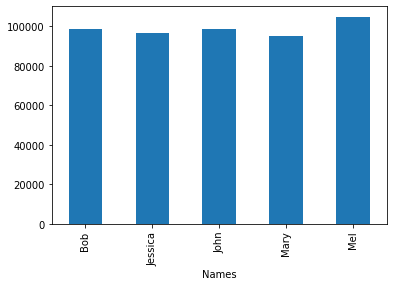

In [24]:
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)